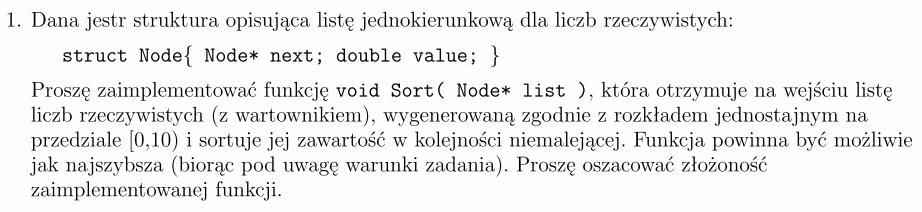

In [1]:
class Node:
    def __init__(self, val=None):
        self.val = val
        self.next = None


def Sort(lst):
    bucket_sort(lst, 0, 10)
        
        
def bucket_sort(ll_head: 'linked list head (sentinel)', min_val, max_val, k: 'threshold' = 32):
    length = linked_list_length(ll_head)
    if length < k:
        insertion_sort(ll_head)
    else:
        # Perform sorting if only there are at least 2 values in a list
        if ll_head.next and ll_head.next.next:
            m = int(2/3 * k)
            buckets_count = length // m + 1
            # Create buckets (a list of sentinel nodes)
            buckets = []
            for _ in range(buckets_count):
                sentinel = tail = Node()
                buckets.append([sentinel, tail])
            # Calculate an interval in order to store values in proper buckets
            val_interval = (max_val - min_val) / buckets_count
            # Distribute values to the proper buckets
            curr = ll_head.next
            while curr:
                # Calculate the bucket's index depending on how much the 
                # current value is greater than the lowest one
                bucket_idx = int((curr.val - min_val) / val_interval - .5)
                tail = buckets[bucket_idx][1]
                tail.next = curr
                buckets[bucket_idx][1] = tail.next
                curr = curr.next
            # Sort each bucket separately
            for bucket in buckets:
                # Remove tail's next node and update a tail after sorting
                bucket[1].next = None
                bucket[1] = insertion_sort(bucket[0])
            # Link buckets together to create a sorted list
            sorted_tail = ll_head
            for bucket in buckets:
                # If a bucket is not empty, link a list to he result
                if bucket[0].next:
                    sorted_tail.next = bucket[0].next
                    sorted_tail = bucket[1]
            
            
def linked_list_length(ll_head: 'linked list head (sentinel)'):
    curr = ll_head.next
    length = 0
    while curr:
        length += 1
        curr = curr.next
    return length


def insert_node(ll_head: 'linked list head (sentinel)', node):  # Inserts node in a right position maintaining the ascending order
    # Insert the node before a greater one
    curr = ll_head
    while node.val > curr.next.val:
        curr = curr.next
    node.next = curr.next
    curr.next = node
        
    
def insertion_sort(ll_head: 'linked list head (sentinel)'):
    if not ll_head.next: return ll_head
    if not ll_head.next.next: return ll_head.next
    
    prev = ll_head.next
    while prev.next: # We start from the second node (prev.next)
        # If a current node (prev.next) has a value lower than a prev node, we have to
        # shift this node to a right position before.
        if prev.next.val < prev.val:
            # Remove a current node
            removed = prev.next
            prev.next = prev.next.next
            # Now we insert this node in a right position
            insert_node(ll_head, removed)
        # We can skip a current node otherwise.
        else:
            prev = prev.next 
    
    return prev

##### Funkcje pomocnicze

In [2]:
def create_linked_list(values: 'iterable' = None) -> 'linked list head (sentinel)':
    head = Node()  # A sentinel node
    if not values: return head
    head.next = curr = Node(values[0])
    for i in range(1, len(values)):
        curr.next = Node(values[i])
        curr = curr.next
    return head


def print_linked_list(ll_head: 'linked list head (sentinel)'):
    curr = ll_head.next
    print(ll_head.val, end=' ')
    while curr:
        print('->', curr.val, end=' ')
        curr = curr.next
    print()
    
    
def linked_list_to_list(ll_head: 'linked list head (sentinel)') -> list:
    values = []
    curr = ll_head.next
    while curr:
        values.append(curr.val)
        curr = curr.next
    return values

###### Kilka testów

In [3]:
import random

# Tworzymy tablicę liczb parami różnych
arr = [round(random.random() * 9.999999999, 3) for _ in range(random.randint(0, 250))]
ll = create_linked_list(arr)
print('Input:')
print_linked_list(ll)
print('\nResult:')
Sort(ll)
print_linked_list(ll)
print('\nIs correct?:', end=' ')
print(linked_list_to_list(ll) == sorted(arr))

Input:
None -> 4.813 -> 4.159 -> 2.979 -> 2.957 -> 7.713 -> 3.071 -> 1.34 -> 3.046 -> 7.19 -> 7.693 -> 7.602 -> 7.842 -> 2.606 -> 5.114 -> 2.356 -> 6.984 -> 2.974 -> 4.126 -> 6.97 -> 6.105 -> 1.061 -> 0.143 -> 7.518 -> 6.281 -> 8.928 -> 2.092 -> 9.172 -> 4.591 -> 9.045 -> 8.578 -> 6.589 -> 1.052 -> 1.853 -> 9.798 -> 0.432 -> 9.942 -> 0.285 -> 9.139 -> 2.76 -> 5.259 -> 5.641 -> 9.18 -> 7.622 -> 8.018 -> 7.675 -> 6.852 -> 5.305 -> 9.277 -> 3.919 -> 3.404 -> 6.977 -> 1.484 -> 2.95 -> 8.803 -> 5.995 -> 4.765 -> 6.518 -> 6.757 -> 4.295 -> 6.308 -> 1.237 -> 3.636 -> 9.825 -> 3.047 -> 2.222 -> 8.243 -> 7.747 -> 0.665 -> 4.449 -> 1.718 -> 9.795 -> 8.011 -> 3.572 -> 4.19 -> 6.324 -> 3.585 -> 5.904 -> 9.828 -> 7.653 -> 4.2 -> 0.299 -> 8.582 -> 9.711 -> 4.807 -> 1.822 -> 1.926 -> 8.995 -> 8.355 -> 9.81 -> 9.45 -> 5.743 -> 4.422 -> 8.979 -> 3.248 -> 6.993 -> 3.725 -> 9.888 -> 9.058 -> 5.764 -> 9.366 -> 3.2 -> 5.467 -> 1.026 -> 3.188 -> 2.941 -> 8.287 -> 2.258 -> 8.826 -> 7.049 -> 6.905 -> 3.367 ->